In [1]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import datetime


%matplotlib inline

In [3]:
#TEST
#Tickers = ["ARKK", "ENOR", "EWC", "FXC", "FXE", "KBA", "KWEB", "XLK", "TLT"]
def get_data(tickersymbol):
    ticker_data = yf.Ticker(tickersymbol)
    ticker_info = ticker_data.info
    investment_name = ticker_info['shortName']
    print(investment_name)
    
    today = datetime.datetime.today().isoformat()
    print("Today is: " + today[:10])
    
    ticker_df = ticker_data.history(period='1d', start='2019-07-15', end=today[:10])
    last_price = ticker_df["Close"].iloc[-1]
    print(ticker_df)
    print(f"{investment_name} price is: ${last_price}")
    #ticker_df["Close"].plot()
get_data('DX-Y.NYB')
print()
#get_data('TLT')

US Dollar/USDX - Index - Cash
Today is: 2020-09-04
             Open   High    Low  Close  Volume  Dividends  Stock Splits
Date                                                                   
2019-07-15  96.84  96.97  96.75  96.93       0          0             0
2019-07-16  96.92  97.44  96.92  97.40       0          0             0
2019-07-17  97.36  97.44  97.16  97.22       0          0             0
2019-07-18  97.20  97.26  96.67  96.79       0          0             0
2019-07-19  96.82  97.29  96.76  97.15       0          0             0
...           ...    ...    ...    ...     ...        ...           ...
2020-08-31  92.30  92.48  91.99  92.14       0          0             0
2020-09-01  92.18  92.40  91.75  92.34       0          0             0
2020-09-02  92.28  92.87  92.21  92.85       0          0             0
2020-09-03  92.66  93.07  92.65  92.74       0          0             0
2020-09-04  92.79  92.89  92.66  92.82       0          0             0

[293 rows x 

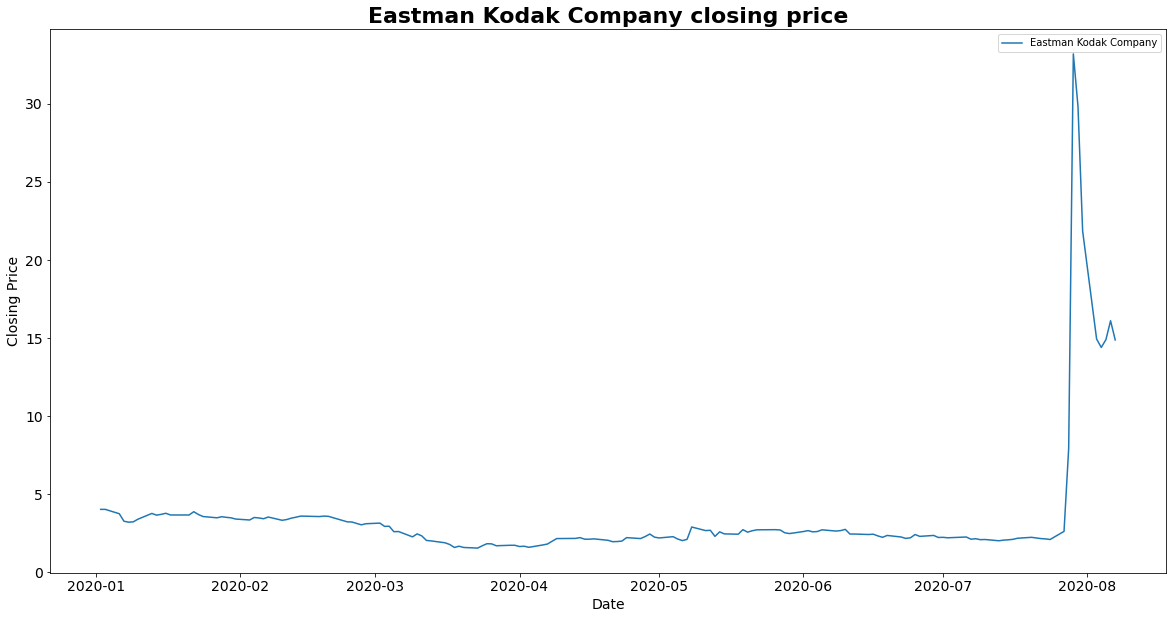

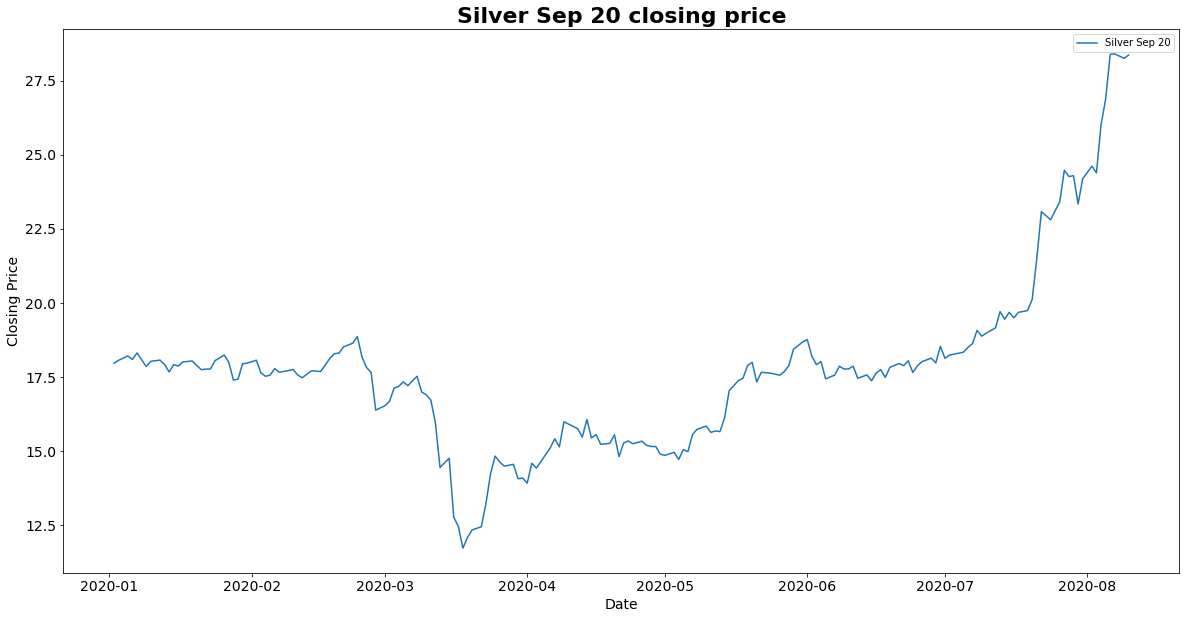

In [4]:
#Charting test
tickers = ['DBC', 'TLT']
def create_plot(tickersymbol):
    ticker_data = yf.Ticker(tickersymbol)
    today = datetime.datetime.today().isoformat()
    
    ticker_df = ticker_data.history(period='1d', start='2020-01-1', end=today[:10])
    plt.subplots(figsize=(20,10))
    plt.plot(ticker_df["Close"], label=ticker_data.info['shortName'])
    plt.xlabel("Date", fontdict={'fontsize':'14'})
    plt.ylabel("Closing Price", fontdict={'fontsize':'14'})
    plt.xticks(size = 14)
    plt.yticks(size = 14)
    plt.legend()
    plt.title(f"{ticker_data.info['shortName']} closing price", fontdict={'fontweight':'bold', 'fontsize':'22'})
    plt.savefig(f'{tickersymbol}.png', bbox_inches="tight")
#create_plot('DBC')
#create_plot('TLT')
#create_plot('FXE')
#create_plot('KWEB')
#create_plot('ECPG')
#create_plot('PRAA')
#create_plot('KODK')
#create_plot('SI=F')

# Multiple Ticker Analysis

In [5]:
#tickers = ['DBC', 'TLT']
start_date = "2020-05-29"

In [13]:
#Download stock data
def download_data(tickers, start_date):
    stock_data = yf.download(tickers,start=start_date)
    stock_data = stock_data.drop(columns=["Close", "High", "Low", "Open", "Volume"])
    return stock_data

#dbc_tlt_df = download_data(['DBC', 'TLT'], "2020-03-23")
#BIG_5_df = download_data(['AAPL', 'AMZN','FB', 'GOOG', 'MSFT'], "2019-12-31")
debt_collectors_df = download_data(['ECPG','PRAA'], "2019-12-31")
debt_collectors_df.head()

[*********************100%***********************]  2 of 2 completed


Adj Close           
                 ECPG       PRAA
Date                            
2019-12-31  35.360001  36.299999
2020-01-02  35.939999  37.029999
2020-01-03  35.459999  36.919998
2020-01-06  35.299999  37.000000
2020-01-07  34.970001  36.639999

In [15]:
# calculate daily returns
def calculate_daily_returns(df):
    df = df.pct_change()
    df = df.dropna()
    return df

#dbc_tlt_returns = calculate_daily_returns(dbc_tlt_df)
#BIG_5_returns = calculate_daily_returns(BIG_5_df)
debt_collectors_returns = calculate_daily_returns(debt_collectors_df)
debt_collectors_returns.head()

Adj Close          
                ECPG      PRAA
Date                          
2020-01-02  0.016403  0.020110
2020-01-03 -0.013356 -0.002971
2020-01-06 -0.004512  0.002167
2020-01-07 -0.009348 -0.009730
2020-01-08  0.010580  0.000546

In [9]:
test = (1+BIG_5_returns).cumprod()
test.tail()

Adj Close                                        
                AAPL      AMZN        FB      GOOG      MSFT
Date                                                        
2020-07-27  1.298039  1.653395  1.137637  1.144485  1.299785
2020-07-28  1.276715  1.623696  1.121169  1.122152  1.288117
2020-07-29  1.301188  1.641663  1.136614  1.138367  1.301124
2020-07-30  1.316932  1.651593  1.142509  1.145420  1.300104
2020-07-31  1.454800  1.712637  1.235907  1.109153  1.307181

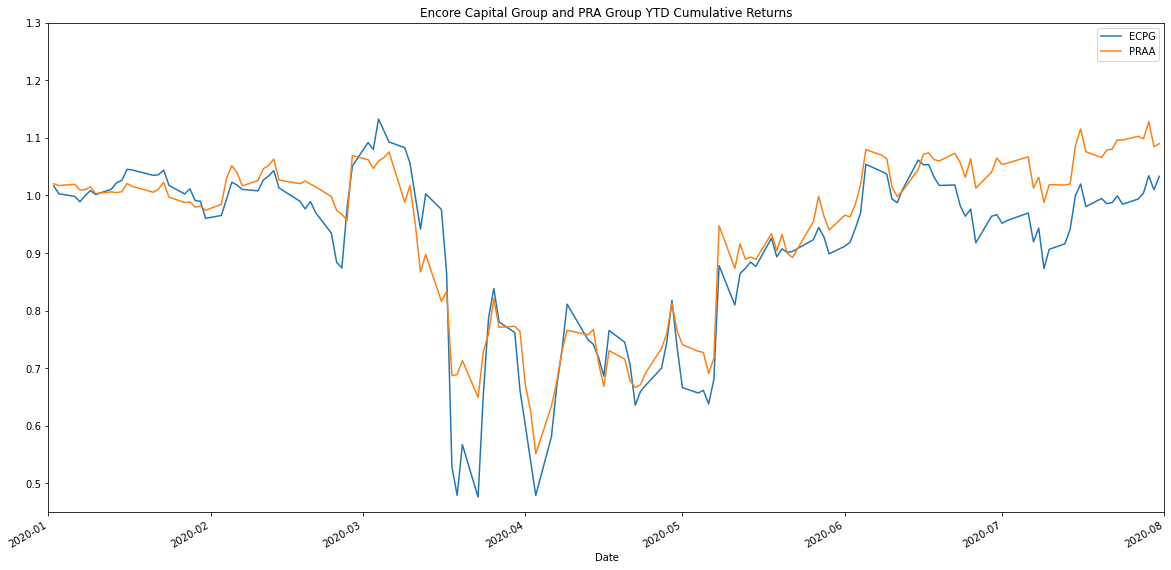

In [20]:
# Clean and calculate cumulative returns finally chart
def create_multiple_ticker_chart(df, title, image_title, tickers):
    cumulative_returns = (1+df).cumprod()
    ax = cumulative_returns.plot(figsize=(20,10), title=title)
    ax.axis(["2020-01-01","2020-08-01",0.45,1.30])
    ax.legend(tickers)
    plt.savefig(f'{image_title}.png', bbox_inches="tight")
"""
create_multiple_ticker_chart(dbc_tlt_returns, 
                             "Commodities and Treasury Yields Indicating Stagflation Risk is Rising",
                             "Commodities_yields_cumulative_returns", 
                             ["DBC", "TLT"])
"""
"""
create_multiple_ticker_chart(BIG_5_returns, 
                             "Big Week for the US Big 5",
                             "Big Week for the US Big 5", 
                             ['AAPL', 'AMZN','FB', 'GOOG', 'MSFT'])
"""
create_multiple_ticker_chart(debt_collectors_returns, 
                             "Encore Capital Group and PRA Group YTD Cumulative Returns",
                             "ECPG_PRA_YTD_Returns", 
                             ['ECPG', 'PRAA'])

In [ ]:
#PLACEHOLDER
cumulative_returns = (1+stock_returns).cumprod()
ax = cumulative_returns.plot(figsize=(20,10), title="Commodities and Treasury yields indicating stagflation risk increasing")
ax.axis(["2020-06-01","2020-07-24",0.95,1.10])
ax.legend(["Invesco DB Commodity Tracking ETF", "iShares Barclays 20+ Yr Treas.Bond (TLT)"])
plt.savefig(f'Commodities_yields_cumulative_returns.png', bbox_inches="tight")

## Risk Analysis
(i) Volatility calculation
(i) Charting volatility


In [11]:
stock_std = stock_returns.std()
stock_std

Adj Close  AAPL    0.017556
           MSFT    0.016151
           TSLA    0.034185
dtype: float64

In [12]:
# Calculate the annualized standard deviation (252 trading days)
stock_std_annual = stock_std * np.sqrt(252)
stock_std_annual

Adj Close  AAPL    0.278695
           MSFT    0.256388
           TSLA    0.542671
dtype: float64

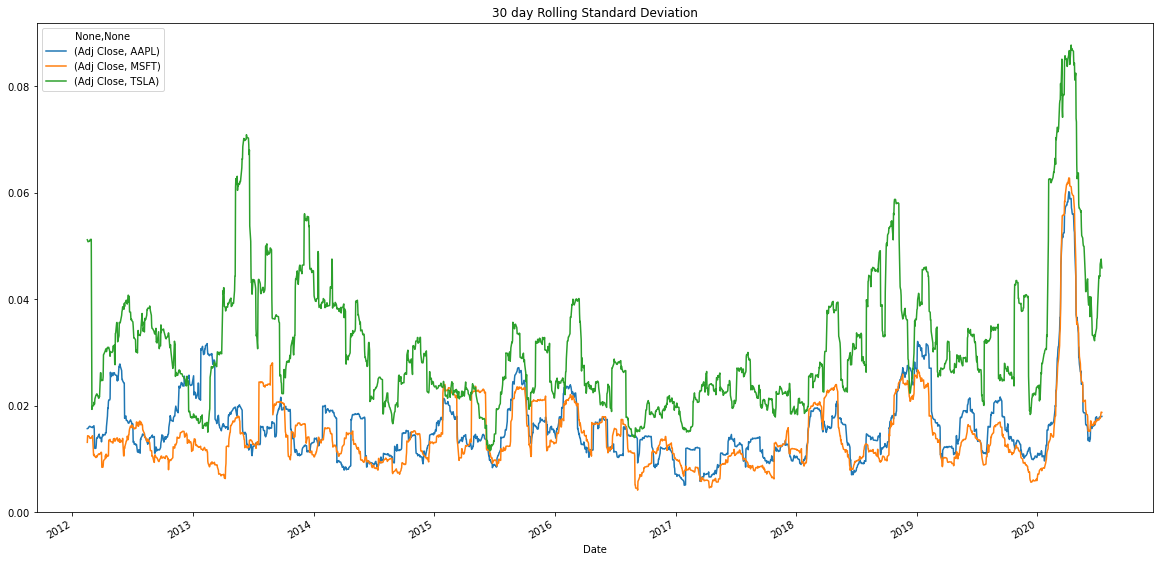

In [13]:
# Realized volatility over 30 days

stock_std_rolling = stock_returns.rolling(window=30).std()
ax = stock_std_rolling.plot(figsize=(20,10),title = "30 day Rolling Standard Deviation")
#ax.axis(["2015-03-03", "2019-05-01", 0.0, 0.035])